<a href="https://colab.research.google.com/github/tedkoo0212/Tensorflow/blob/main/Tensorflow102_notes_TedKoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# 102_총 복습 및 정리
import tensorflow as tf
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)
# 우측이 무언가 값을 반환하긴 하는데 이 상황에서는 ,_ 로 빈 칸으로 놓음.(지금 사용하지 않는구나 까지만 이해)

(cifar_x, cifar_y),_ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


[5 0 4 1 9 2 1 3 1 4]


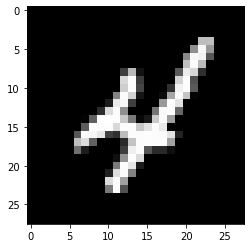

In [11]:
# 1.화면 출력
# 이미지 한장을 출력해보자

print(mnist_y[0:10])
import matplotlib.pyplot as plt #matplot library 밑의 pyplot이라는 module 을 plt로 사용하겠습니다~
plt.imshow(mnist_x[9], cmap='gray') #실제로는 gray color 인데 왜 cmap설정을 안 해주면 노랑배경으로 나올까?


[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


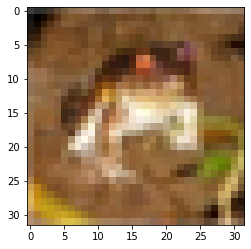

In [16]:
print(cifar_y[0:10])
plt.imshow(cifar_x[0], cmap='gray') #실제로는 gray color 인데 왜 cmap설정을 안 해주면 노랑배경으로 나올까?


In [20]:
# 2 차원 확인

import numpy as np

d1 = np.array([1,2,3,4,5])
print(d1.shape)

d2 = np.array([d1,d1,d1,d1])
print(d2.shape)

d3 = np.array([d2,d2,d2])
print(d3.shape)

d4 = np.array([d3,d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [21]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [22]:
''' 
결국 reshape 을 통해 28*28 을 784개에 넣어준다.
모든 pixel값에 대해 weight를 학습한다.
weight가 높다는것은 해당 pixel이 중요하다는 의미
가중치가 0에 가까운 픽셀은 0이라고(0번쨰 종속변수라고) 판단하기에 불필요한 픽셀이다.

84개의 Node로 이루어진 Hiddel Layer를 넣어보자.
computer가 인공 신경망 구조 안에서 가중치 학습에 의해 84개의 은닉층(hidden layer)를 만든 것이다.

computer야, 0-9까지 중 어느 숫자인지 판단하기 위해 가장 좋은 특징 84개를 찾아줘
=
computer= 특징 자동 추출기 
'''




' \n결국 reshape 을 통해 28*28 을 784개에 넣어준다.\n모든 pixel값에 대해 weight를 학습한다.\nweight가 높다는것은 해당 pixel이 중요하다는 의미\n가중치가 0에 가까운 픽셀은 0이라고(0번쨰 종속변수라고) 판단하기에 불필요한 픽셀이다.\n\n84개의 Node로 이루어진 Hiddel Layer를 넣어보자.\ncomputer가 인공 신경망 구조 안에서 가중치 학습에 의해 84개의 은닉층(hidden layer)를 만든 것이다.\n\ncomputer야, 0-9까지 중 어느 숫자인지 판단하기 위해 가장 좋은 특징 84개를 찾아줘\n=\ncomputer= 특징 자동 추출기 \n'

In [25]:
'''
즉, Flatten Layer의 역할은 reshape이 하는 역할을 모델 구조 만드는 단계에서 할 수 있다는 것.?

입력의 모양과 Flatten Layer를 주목하자.

1. With Reshape
2. With Flatten

'''

'\n즉, Flatten Layer의 역할은 reshape이 하는 역할을 모델 구조 만드는 단계에서 할 수 있다는 것.?\n\n입력의 모양과 Flatten Layer를 주목하자.\n\n1. With Reshape\n2. With Flatten\n\n'

In [33]:
import pandas as pd
# 데이터를 준비하고 
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립 = 독립.reshape(60000,784)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


In [35]:
# modeling

X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84, activation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')


In [36]:
# train a model

# model.fit(Independent Variable, Dependent Variable, epochs=training times)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7246 - accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5670 - accuracy: 0.9139
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4840 - accuracy: 0.9291
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4271 - accuracy: 0.9391
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3973 - accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.9472
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.9486
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.9525
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.9517
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.335

In [39]:
# use model to predict

model.predict(독립[0:5])
# data looks ugly and difficult to grasp 빠르게


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.4076256e-10,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.4878380e-32, 1.0371148e-36,
        3.1481323e-36, 7.1857382e-32, 0.0000000e+00, 6.1885877e-25,
        3.6504349e-21, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.4428134e-29, 1.2009191e-10,
        1.6912742e-04, 1.8073939e-09, 0.0000000e+00, 3.9612465e-07,
        3.0952341e-12, 9.9983048e-01]], dtype=float32)

In [41]:
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 2 : round up at second(2) decimal point

## So, DataFrame Module helps to convert array into table format ?


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# 독립[0:9]예측값 (총 10개) 중 실제 dataset값과 일치하는 갯수에 따른 모델 평가
# 10개면 excellent
# 6-9개면 good
# 3-5개면 fine
# 0-2개면 needs improvement

In [43]:
int n=0
while(n<10){
    if()
    n++;
}
# how to compare values by index in pd.DataFrame ?

SyntaxError: ignored

In [44]:
# With Flatten Layer

In [45]:
# Prepare the data
import pandas as pd
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

# 독립 = 독립.reshape(60000,784)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)


(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)


In [46]:
# modeling

X = tf.keras.layers.Input(shape=[28,28])
H = tf.keras.layers.Flatten()(X) # 얘가 알아서 윗줄의 28x28데이터를 한 줄로 펴준다.
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')


In [47]:
# train a model

# model.fit(Independent Variable, Dependent Variable, epochs=training times)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6325 - accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5525 - accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.9297
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4522 - accuracy: 0.9361
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4169 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3980 - accuracy: 0.9434
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.9448
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3935 - accuracy: 0.9476
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3794 - accuracy: 0.9488
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.381

In [48]:
# use model to predict

model.predict(독립[0:5])
# data looks ugly and difficult to grasp 빠르게


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6284323e-09,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.3785507e-38],
       [1.0000000e+00, 0.0000000e+00, 3.3823663e-28, 0.0000000e+00,
        0.0000000e+00, 1.2447277e-32, 1.7835497e-30, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.3273914e-27,
        1.6011916e-09, 1.8163615e-24, 0.0000000e+00, 4.4145807e-15,
        1.8248877e-19, 1.0000000e+00]], dtype=float32)

In [49]:
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 2 : round up at second(2) decimal point

## So, DataFrame Module helps to convert array into table format ?


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# 이렇게, 이미지 형태의 데이터를 표 형태로 바꿔서,
# 표 형태를 학습하는 모델 속에 넣어서 학습을 시킨 것이다.
# 특징 자동 추출기라는 부분에 집중해서 본 것이다.
# 컴퓨터가 직접 84개를 찾았고, 이에 따라 10개의 숫자 이미지로 분류했다.
# 즉, 10개의 분류를 만들기 위해 제일 중요한 좋은 84개를 찾았다. 

In [53]:
# Convolution은 뭘까?
# 생소한 개념이니까 잘 이해하고 넘어가자.
# 9 8 6 0 동그라미가 나타나는 특징. 동그라미가 어느 위치 즈음에 있는지.  
# 특정한 패턴의 특징이 어디서 나타나는지를 확인하는 도구 = Convolution = 합성곱
# 특징을 찾기 위한 Convolution Filter 
# Convolution Filter의 결과는 2차원 형태의 숫자 집합이 된다.
# 이렇게 대상 이미지로부터 필터를 통해 특징을 잡아낸 특징에? 대한 위치 정보가 포함된 지도라는 의미로 필터 맵이라고 부른다.
# 가로선, 세로선
# 필터 1개 -> 대상 이미지를 보고 -> 이미지 1개 생성 
# 하얗게 나온 부분이 찾고 싶은 특징이 많이 나온 부분

In [54]:
# 1. preparing data

(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000,28,28,1) #3차원 형태의 dataset으로 만들어주는 이유 : Conv2D 는 3차원을 다룰 수 있어서.
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28, 1) (60000, 10)


In [55]:
# 2. Modeling
'''
X = tf.keras.layers.Input(shape=[28,28,1])
                 Conv2D
                 Conv2D
H = tf.keras.layers.Flatten()(X) # 얘가 알아서 윗줄의 28x28데이터를 한 줄로 펴준다.
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
이게 원래 code
'''

X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)   # 3개의 특징 맵 = 3채널의 특징 맵
H = tf.keras.layers.Conv2D(5, kernel_size=5, activation='swish')(H)   # 5개의 특징 맵 = 5채널의 특징 맵
H = tf.keras.layers.Flatten()(X) # 얘가 알아서 윗줄의 28x28데이터를 한 줄로 펴준다.
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')


In [58]:
# 3. model fitting
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4024 - accuracy: 0.8557
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5667 - accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4591 - accuracy: 0.9348
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4276 - accuracy: 0.9425
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.9494
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3571 - accuracy: 0.9519
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3405 - accuracy: 0.9537
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3443 - accuracy: 0.9562
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.314

In [59]:
# 4. use model to predict
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Understanding Filter
'''
1. 필터셋은 3차원 형태로 된 가중치의 모음 (개별 filter set 1개가 3차원이다.)
2. 필터셋 하나는 앞선 레이어의 결과인 '특징맵' 전체를 본다.
3. 필터셋 개수 만큼 특징맵을 만든다.


In [1]:
# Convolution Layer
# 컴퓨터가 결국 filter를 찾는 것이다.
# Using GPU helps you get model trained faster.

In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
#1 데이터를 준비하고
(독립, 종속),_ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)


In [4]:
# convolution layer는 image하나의 shape의 모양이 3차원이어야 한다. (2차원 지원 X)
독립 = 독립.reshape(60000,28,28,1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape) # one-hot encoding
#Note that: (60000, 28, 28) ---reshape--> (60000,28,28,1)

(60000, 28, 28, 1) (60000, 10)


In [5]:
#1 modeling
X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) # As Dense layer, Convolution layer requires activation function
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [6]:
#2 model fitting 
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4962 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0615 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0386 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [9]:
#3 use model to predict
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Compare !

In [10]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                201684    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_______________________________________________________

In [ ]:
# (28,28,1) ----kurnel_size=5----> (24,24,3)

## CNN 의 남은 마지막 퍼즐 : Pooling (MaxPool2D)

In [12]:
'''
  PARAMETER(weights)를 줄이기 위해 Flatten Layer의 결과값이 커지는것을 피하자.
  MaxPool2D

    Why is it called pooling?

    How does it get halfed ?
    6x6 size down to 3x3 ?
        find max value within every 2x2 'filters' and make a new 3x3 table
    
    How can we say maximum values among 2x2 for each parts are meaningful(result)?
        Larger value refers to an part(area) where 필터로 찾으려는 특징이 많이 일어난 부분.

'''

"\n  PARAMETER(weights)를 줄이기 위해 Flatten Layer의 결과값이 커지는것을 피하자.\n  MaxPool2D\n\n    Why is it called pooling?\n\n    How does it get halfed ?\n    6x6 size down to 3x3 ?\n        find max value within every 2x2 'filters' and make a new 3x3 table\n    \n    How can we say maximum values among 2x2 for each parts are meaningful(result)?\n        Larger value refers to an part(area) where 필터로 찾으려는 특징이 많이 일어난 부분.\n\n"

In [24]:
#0 library

import tensorflow as tf
import pandas as pd

In [25]:
#1 prepare the dataset

(독립,종속),_ = tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)

독립 = 독립.reshape(60000,28,28,1)
종속 = pd.get_dummies(종속)
print(독립.shape,종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [22]:
#2 modeling and CNN

X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [23]:
model.summary()
# After Flatten Layer, Parameters(weights) = (96+1)*84 = 8148

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 6)           0         
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 84)                8148

In [ ]:
#3 model fitting
model.fit(독립,종속,epochs=10) 

In [ ]:
#4 use model
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 2 : round up at second(2) decimal point

In [ ]:
종속[0:5]

In [ ]:
print(독립[0])


# CNN called LeNet by Yann LeCun (1998)

In [12]:
import tensorflow as tf
import pandas as pd

In [13]:
#1 prepare the dataset

(독립,종속),_ = tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)

독립 = 독립.reshape(60000,28,28,1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)


(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [33]:
# 2 modeling

# convolution layer에 padding이라는 option을 추가해주었다.
# convolution의 결과인 feature map의 사이즈가 입력이미지와 동일한 크기로 출력이 된다.


X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [31]:
# 3 model fitting

model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 3ms/step - loss: 0.3033 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0903 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0745 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0628 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - accuracy: 0.9858
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - accuracy: 0.9870
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0685 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

In [32]:
# 4 use model
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 2 : round up at second(2) decimal point

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 120)               481

In [35]:
# Lenet 실습 


In [3]:
import tensorflow as tf
import pandas as pd

In [4]:
(독립,종속),_ = tf.keras.datasets.cifar10.load_data()
print(독립.shape, 종속.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [6]:
# 독립 = 독립.reshape() is unnecessary.
# Independent variable sets is already 3 Dimensional which allows MaxPool2D 

종속 = pd.get_dummies(종속.reshape(50000)) # after one-hot encoding. categorical data.
print(독립.shape,종속.shape)

(50000, 32, 32, 3) (50000, 10)


In [12]:
X = tf.keras.layers.Input(shape=[32,32,3])

H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H) 
H = tf.keras.layers.Dense(84, activation='swish')(H) 
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [13]:
model.fit(독립,종속,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3366 - accuracy: 0.2886
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6008 - accuracy: 0.4286
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4975 - accuracy: 0.4695
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4544 - accuracy: 0.4906
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4244 - accuracy: 0.5003
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4091 - accuracy: 0.5072
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3964 - accuracy: 0.5131
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3856 - accuracy: 0.5186
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3911 - accuracy: 0.5192
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.388

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 3)         228       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               4812

In [15]:
'''
1. 이미지 데이터를 구성하는 방법
2. 이미지 데이터를 읽어들이는 코드의 사용법
'''

'\n1. 이미지 데이터를 구성하는 방법\n2. 이미지 데이터를 읽어들이는 코드의 사용법\n'

In [16]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [17]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')  # 파일명에 .png를 포함한 것들의 경로들을 저장
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [18]:
종속[0:10]

array(['I', 'B', 'D', 'I', 'D', 'H', 'H', 'G', 'B', 'H'], dtype='<U1')

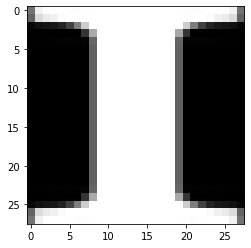

In [19]:
plt.imshow(독립[3], cmap='gray')

In [20]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [21]:
import tensorflow as tf 

# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [22]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 3s 4ms/step - loss: 0.5045 - accuracy: 0.8531
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2665 - accuracy: 0.9209
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2104 - accuracy: 0.9369
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1764 - accuracy: 0.9461
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1494 - accuracy: 0.9530
Epoch 6/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1288 - accuracy: 0.9591
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9643
Epoch 8/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0909 - accuracy: 0.9709
Epoch 9/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0794 - accuracy: 0.9746
Epoch 10/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0644 - accuracy: 0.9794